In [116]:
# Activity 3 - Titanic Dataset Analysis using Decision Trees, Marce Martinez.

# Este Notebook sigue los pasos de la consigna para analizar el conjunto de datos del Titanic 
# usando árboles de decisión.
# Incluye cargar los datos, manejar valores faltantes, codificar variables categóricas, 
# preparar los datos para el modelado, construir un modelo de árbol de decisión, 
# evaluar el modelo y hacer predicciones en el conjunto de prueba. 

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

train_df = pd.read_csv('https://raw.githubusercontent.com/ml008008/Portfolio/main/train(3).csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/ml008008/Portfolio/main/test(3).csv')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
#Descripcion de valores faltantes

valores_faltantes_train = train_df.isnull().sum()
valores_faltantes_test = test_df.isnull().sum()

print("Valores faltantes en el conjunto de datos de entrenamiento:\n", valores_faltantes_train)

Valores faltantes en el conjunto de datos de entrenamiento:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [119]:
#Resultados

# Conjunto de datos de entrenamiento muestra: 
# 177 valores faltantes en la columna'Age',
# 687 valores faltantes en la columna 'Cabin'
# 2 valoresfaltantes en la columna 'Embarked'

In [120]:
print("Valores faltantes en el conjunto de datos de prueba:\n", valores_faltantes_test)

Valores faltantes en el conjunto de datos de prueba:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [121]:
# Resultados

# Conjunto de datos de prueba muestra:
# 86  valores faltantes en la columna 'Age'
# 1   valor faltante en la columna 'Fare'
# 327 valores faltantes en la columna 'Cabin'

In [122]:
#Imputacion de datos
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Cabin'].fillna('Unknown', inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df['Cabin'].fillna('Unknown', inplace=True)

/var/folders/kc/lmcph3h14hj9vsq6nysrx5vc0000gn/T/ipykernel_86550/2524577471.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
/var/folders/kc/lmcph3h14hj9vsq6nysrx5vc0000gn/T/ipykernel_86550/2524577471.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [123]:
#Validacion de valores faltantes
valores_faltantes_train = train_df.isnull().sum()
valores_faltantes_test = test_df.isnull().sum()

print("Valores faltantes en el conjunto de datos de entrenamiento:\n", valores_faltantes_train)

Valores faltantes en el conjunto de datos de entrenamiento:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [124]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [125]:
print("Valores faltantes en el conjunto de datos de prueba:\n", valores_faltantes_test)

Valores faltantes en el conjunto de datos de prueba:
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [126]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Unknown,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Unknown,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Unknown,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Unknown,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Unknown,S


In [127]:
#Resultado: 0 valores faltantes en ambos conjuntos de datos

In [128]:
#Codificacion de variables categoricas
label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
test_df['Sex'] = label_encoder.transform(test_df['Sex'])
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked'])
test_df['Embarked'] = label_encoder.transform(test_df['Embarked'])


In [129]:
#Preparacion de datos para modelado
# Seleccion de características y variable objetivo
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_df[features]
y = train_df['Survived']

# Division de datos en conjuntos de entrenamiento y validación.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
#Construccion de Modelo de Árbol de Decision.
# Creacion de un clasificador de árbol de decision
clf = DecisionTreeClassifier(random_state=42)

# Entrenamiento de modelo
clf.fit(X_train, y_train)

# Predicccion en el conjunto de validacion
y_pred = clf.predict(X_val)

In [131]:
#Evaluacion del Modelo
from sklearn.metrics import accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print(f'Exactitud: {accuracy:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'Recall: {recall:.2f}')

Exactitud: 0.78
F1-Score: 0.75
Recall: 0.77


In [132]:
#Prediccion con Conjunto de Prueba 

test_X = test_df[features]
test_predictions = clf.predict(test_X)

submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions
})

submission



,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


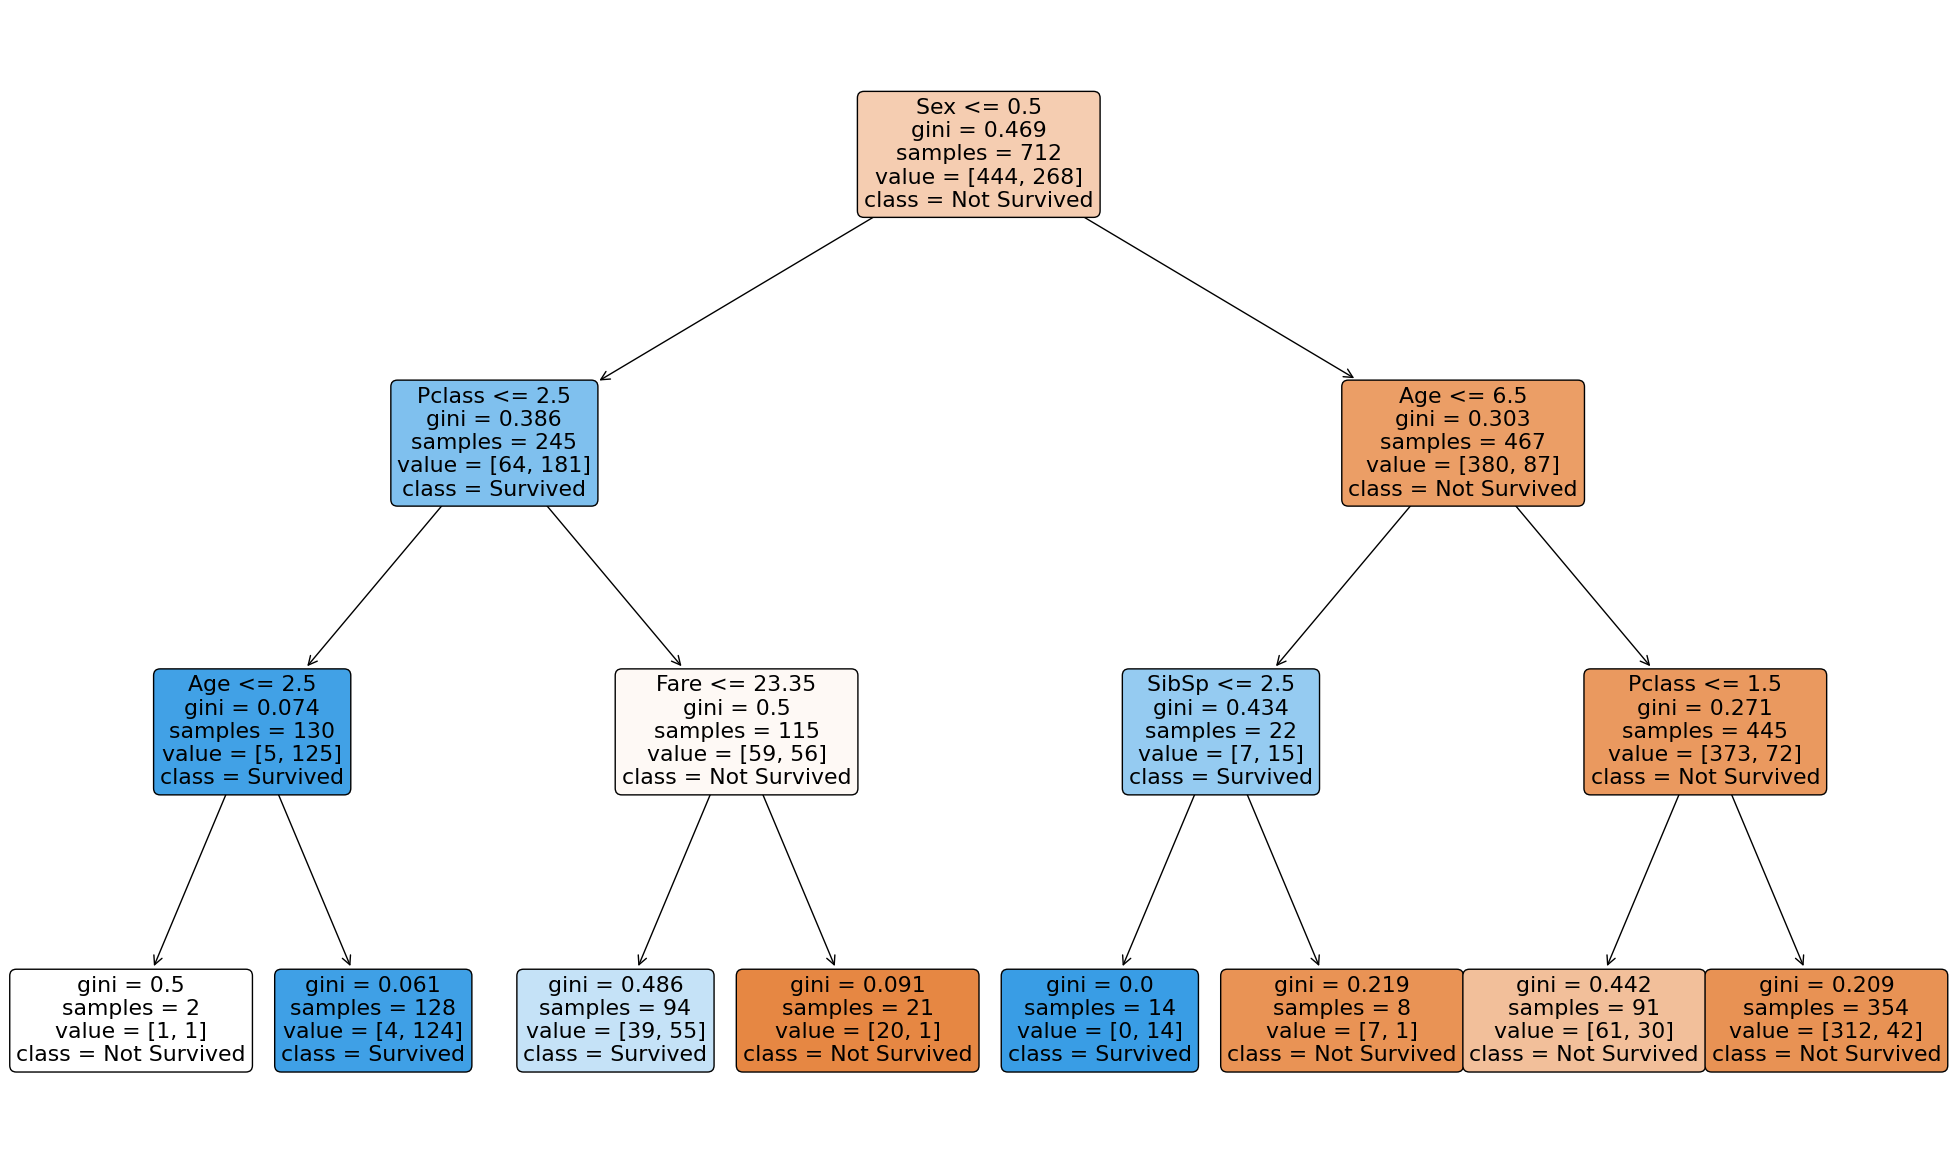

In [133]:
#Arbol de decision
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
plt.figure(figsize=(25,15))
plot_tree(clf, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.show()



In [134]:
#Gracias!